In [1]:
from csv import DictReader
import numpy as np

with open('_data/fluidized_bed.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

headers = list(rows[0].keys())

In [2]:
from scipy.stats import spearmanr

for idx, r in enumerate(rows):
    for h in headers:
        if r[h] == '-':
            rows[idx][h] = 0.0

A = np.asarray([[float(r[h]) for h in headers] for r in rows])
corr, p_val = spearmanr(A, axis=0)
print(corr.shape, p_val.shape)

(12, 12) (12, 12)


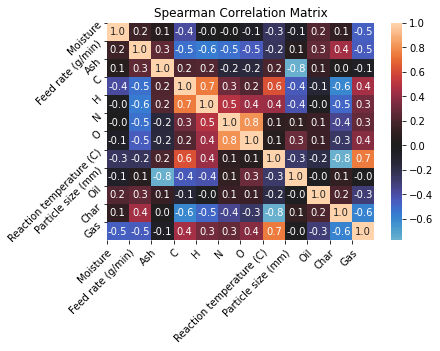

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.clf()
ax = sns.heatmap(corr, center=0, annot=True, fmt='.1f')
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(headers)))
ax.set_xticklabels(headers)
ax.set_yticklabels(headers)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Spearman Correlation Matrix')
plt.show()

In [4]:
target_corr = corr[-3:, :-3]
print(target_corr)

[[ 0.22352396  0.26649079  0.13091839 -0.13998055 -0.02434582  0.14510249
   0.14656538 -0.18888219 -0.02793668]
 [ 0.10254784  0.44524731  0.00949732 -0.60596318 -0.48972547 -0.35329056
  -0.25688168 -0.77328591  0.1070148 ]
 [-0.47449654 -0.4571376  -0.06170762  0.44761967  0.31937953  0.27839409
   0.36979755  0.74740829 -0.02237237]]


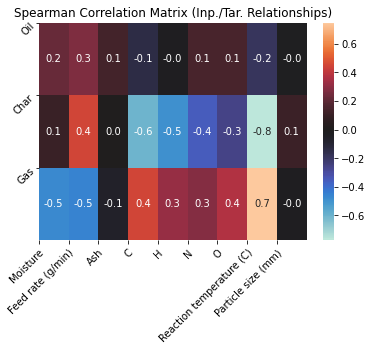

In [5]:
plt.clf()
ax = sns.heatmap(target_corr, center=0, annot=True, fmt='.1f')
ax.set_xticks(np.arange(len(headers[:-3])))
ax.set_yticks(np.arange(len(headers[-3:])))
ax.set_xticklabels(headers[:-3])
ax.set_yticklabels(headers[-3:])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Spearman Correlation Matrix (Inp./Tar. Relationships)')
plt.show()

In [6]:
total_magnitudes = np.sum(np.abs(target_corr), axis=0)
print('Total magnitude of Spearman coefficients for each input variable:')
for i in range(len(headers[:-3])):
    print(headers[i], '{:.3f}'.format(total_magnitudes[i]))

Total magnitude of Spearman coefficients for each input variable:
﻿Moisture 0.801
Feed rate (g/min) 1.169
Ash 0.202
C 1.194
H 0.833
N 0.777
O 0.773
Reaction temperature (C) 1.710
Particle size (mm) 0.157


In [7]:
reaction_temp = [float(r['Reaction temperature (C)']) for r in rows]
feed_rate = [float(r['Feed rate (g/min)']) for r in rows]
carbon = [float(r['C']) for r in rows]

oil = [float(r['Oil']) for r in rows]
char = [float(r['Char']) for r in rows]
gas = [float(r['Gas']) for r in rows]

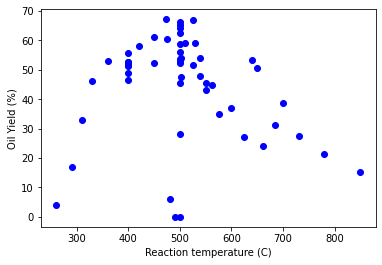

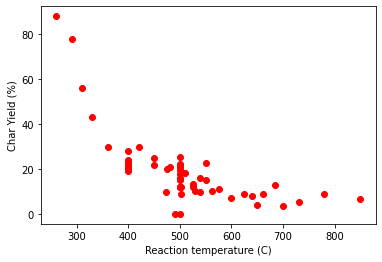

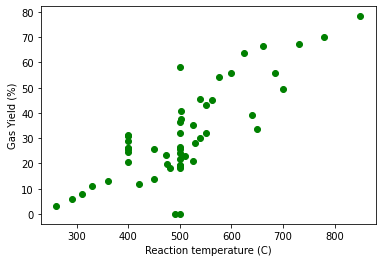

In [8]:
plt.clf()
plt.scatter(reaction_temp, oil, color='blue', label='Oil')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('Oil Yield (%)')
plt.show()
plt.clf()
plt.scatter(reaction_temp, char, color='red', label='Char')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('Char Yield (%)')
plt.show()
plt.clf()
plt.scatter(reaction_temp, gas, color='green', label='Gas')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('Gas Yield (%)')
plt.show()